# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | port-vila
Processing Record 5 of Set 1 | zharkent
Processing Record 6 of Set 1 | maragogi
Processing Record 7 of Set 1 | sabha
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | chibougamau
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | vadso
Processing Record 13 of Set 1 | pierre
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | olhao
Processing Record 16 of Set 1 | las tablas
Processing Record 17 of Set 1 | kiffa
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | adamstown
P

Processing Record 42 of Set 4 | hangu
Processing Record 43 of Set 4 | calvinia
Processing Record 44 of Set 4 | hadibu
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | tynda
Processing Record 48 of Set 4 | maughold
Processing Record 49 of Set 4 | west island
Processing Record 0 of Set 5 | udachny
Processing Record 1 of Set 5 | kudahuvadhoo
Processing Record 2 of Set 5 | san antonio
Processing Record 3 of Set 5 | buka
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | ladario
Processing Record 6 of Set 5 | susanville
Processing Record 7 of Set 5 | adh dhibiyah
City not found. Skipping...
Processing Record 8 of Set 5 | yuzhno-kurilsk
Processing Record 9 of Set 5 | talcahuano
Processing Record 10 of Set 5 | howard springs
Processing Record 11 of Set 5 | kangding
Processing Record 12 of Set 5 | namibe
Processing Record 13 of Set 5 | port elizabeth
Processing Record 14 of Set 5 | sitka
Processing Reco

Processing Record 35 of Set 8 | leava
Processing Record 36 of Set 8 | kasane
Processing Record 37 of Set 8 | camarinas
Processing Record 38 of Set 8 | gutierrez zamora
Processing Record 39 of Set 8 | campos belos
Processing Record 40 of Set 8 | ust'-ilimsk
Processing Record 41 of Set 8 | thaba nchu
Processing Record 42 of Set 8 | pimentel
Processing Record 43 of Set 8 | emporia
Processing Record 44 of Set 8 | gokceada
Processing Record 45 of Set 8 | pasuquin
Processing Record 46 of Set 8 | dickinson
Processing Record 47 of Set 8 | broken hill
Processing Record 48 of Set 8 | ambagarh chauki
Processing Record 49 of Set 8 | greymouth
Processing Record 0 of Set 9 | chiredzi
Processing Record 1 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 9 | iskateley
Processing Record 3 of Set 9 | ak'ordat
Processing Record 4 of Set 9 | suva
Processing Record 5 of Set 9 | paka
Processing Record 6 of Set 9 | alaior
Processing Record 7 of Set 9 | correntina
Processing Record 8 o

Processing Record 27 of Set 12 | kemin
Processing Record 28 of Set 12 | shengli
Processing Record 29 of Set 12 | noventa vicentina
Processing Record 30 of Set 12 | svetlyy
Processing Record 31 of Set 12 | lewistown
Processing Record 32 of Set 12 | villamontes
Processing Record 33 of Set 12 | margherita
Processing Record 34 of Set 12 | shingu
Processing Record 35 of Set 12 | ayaguz
City not found. Skipping...
Processing Record 36 of Set 12 | port moresby
Processing Record 37 of Set 12 | popondetta
Processing Record 38 of Set 12 | novo aripuana
Processing Record 39 of Set 12 | crane
Processing Record 40 of Set 12 | lisala
Processing Record 41 of Set 12 | walvis bay
Processing Record 42 of Set 12 | homosassa springs
Processing Record 43 of Set 12 | iaciara
Processing Record 44 of Set 12 | shpola
Processing Record 45 of Set 12 | maardu
Processing Record 46 of Set 12 | mollendo
Processing Record 47 of Set 12 | ribeira brava
Processing Record 48 of Set 12 | balabac
Processing Record 49 of Se

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-24.11,97,100,3.41,RU,1708651736
1,invercargill,-46.4000,168.3500,22.13,39,100,1.30,NZ,1708651599
2,ilulissat,69.2167,-51.1000,-11.99,85,100,0.00,GL,1708651737
3,port-vila,-17.7338,168.3219,30.78,74,40,5.14,VU,1708651737
4,zharkent,44.1628,80.0000,-4.72,49,100,1.07,KZ,1708651737


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-24.11,97,100,3.41,RU,1708651736
1,invercargill,-46.4000,168.3500,22.13,39,100,1.30,NZ,1708651599
2,ilulissat,69.2167,-51.1000,-11.99,85,100,0.00,GL,1708651737
3,port-vila,-17.7338,168.3219,30.78,74,40,5.14,VU,1708651737
4,zharkent,44.1628,80.0000,-4.72,49,100,1.07,KZ,1708651737


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

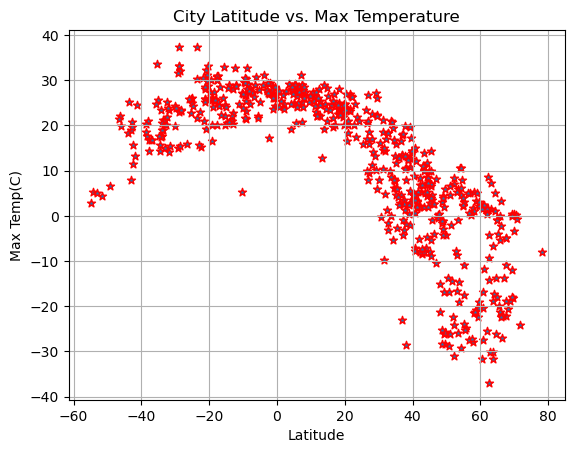

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = '*', edgecolor = 'red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
# Save the figure
plt.savefig("../output_data/lat_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

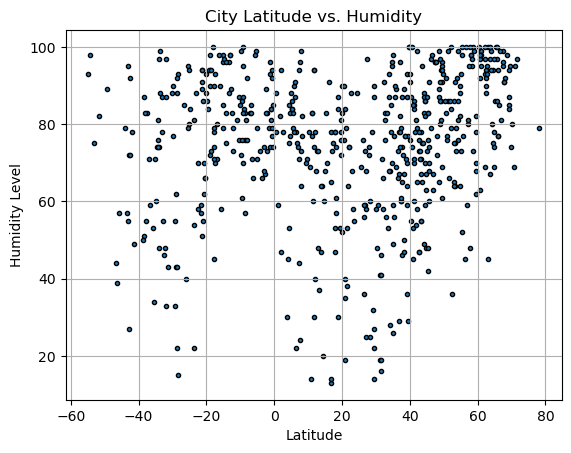

In [22]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = '.', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity Level")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_hum.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

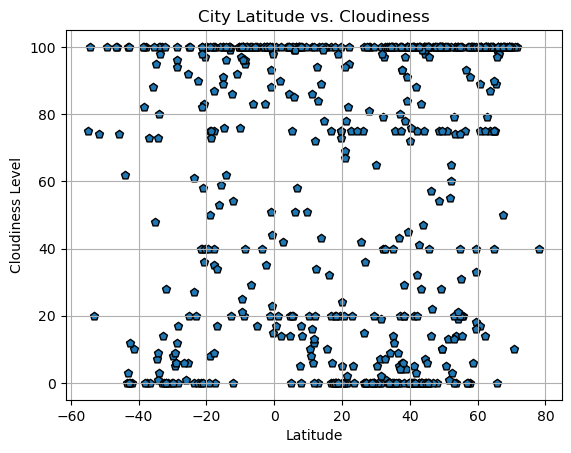

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'p', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Level")
plt.title("City Latitude vs. Cloudiness")
plt.grid()


# Save the figure
plt.savefig("../output_data/lat_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

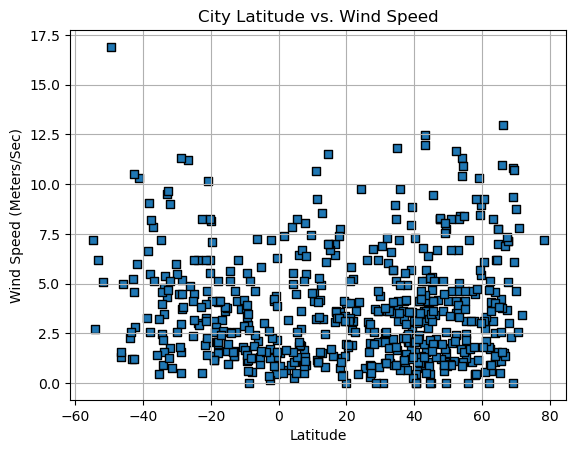

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 's', edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Meters/Sec)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def linear_regression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    linear = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x, linear,"r-")
    line="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    plt.annotate(line, ann_loc, fontsize=12,color="blue")
    print(f"rvalue: {rvalue}")
   

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_northern = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
df_northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-24.11,97,100,3.41,RU,1708651736
2,ilulissat,69.2167,-51.1000,-11.99,85,100,0.00,GL,1708651737
4,zharkent,44.1628,80.0000,-4.72,49,100,1.07,KZ,1708651737
6,sabha,27.0377,14.4283,9.51,58,0,0.28,LY,1708651737
8,bilibino,68.0546,166.4372,-20.70,92,100,2.99,RU,1708651737


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
df_southern = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
df_southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,22.13,39,100,1.30,NZ,1708651599
3,port-vila,-17.7338,168.3219,30.78,74,40,5.14,VU,1708651737
5,maragogi,-9.0122,-35.2225,26.67,84,20,2.91,BR,1708651737
7,waitangi,-43.9535,-176.5597,18.23,79,62,2.24,NZ,1708651737
10,alice springs,-23.7000,133.8833,37.34,22,61,6.17,AU,1708651737


###  Temperature vs. Latitude Linear Regression Plot

rvalue: -0.8098866134625117


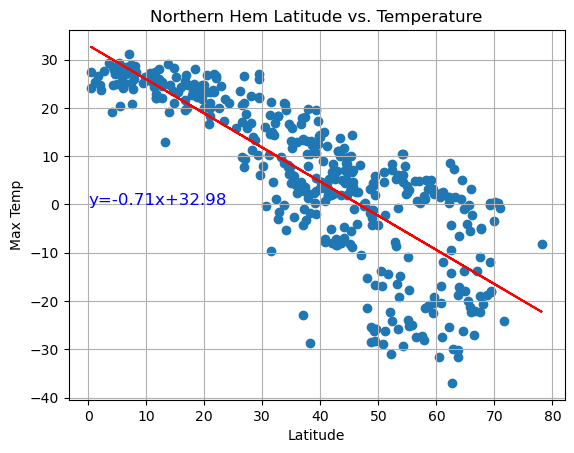

In [61]:
# Linear regression on Northern Hemisphere
x = df_northern['Lat']
y = df_northern['Max Temp']
ann_loc = (0,0)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hem Latitude vs. Temperature")
plt.grid()
plt.show()


rvalue: 0.5680604793134191


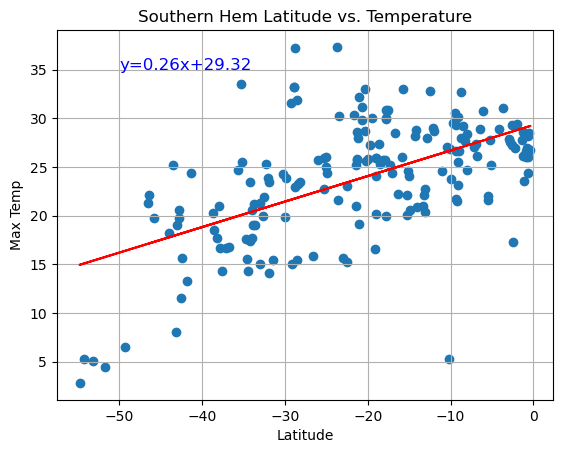

In [62]:
# Linear regression on Southern Hemisphere
x = df_southern['Lat']
y = df_southern['Max Temp']
ann_loc = (-50,35)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hem Latitude vs. Temperature")
plt.grid()
plt.show()

**Discussion about the linear relationship:** The linear regressions demonstrate a strong negative correlation between lattitude and temperature in the Northern hemisphere, and a moderate positive correlation between lattitude and temperature in the Southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

rvalue: 0.3527497124693951


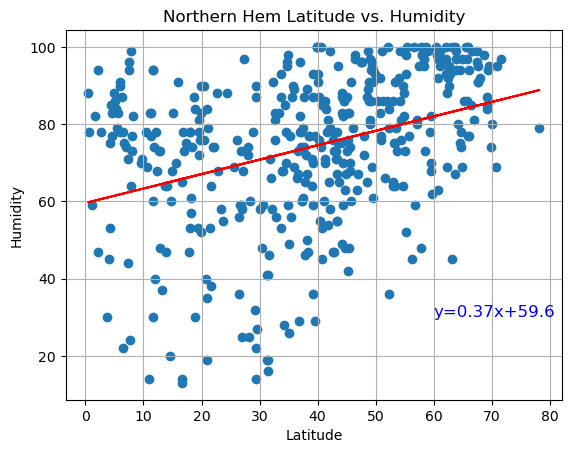

In [63]:
# Northern Hemisphere
x = df_northern['Lat']
y = df_northern['Humidity']
ann_loc = (60,30)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hem Latitude vs. Humidity")
plt.grid()
plt.show()


rvalue: 0.2930758055292485


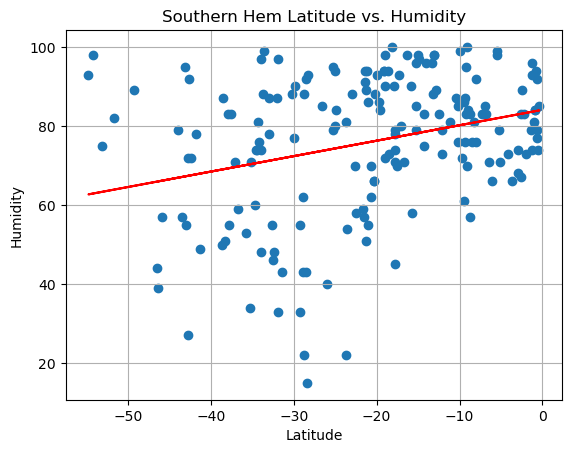

In [64]:
# Southern Hemisphere
x = df_southern['Lat']
y = df_southern['Humidity']
ann_loc = (-20,10)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hem Latitude vs. Humidity")
plt.grid()
plt.show()

**Discussion about the linear relationship:** The linear regressions demonstrate a weak positive correlation between latitude and humidity in both the Northern and Southern hemispheres.  


### Cloudiness vs. Latitude Linear Regression Plot

rvalue: 0.20670929024177762


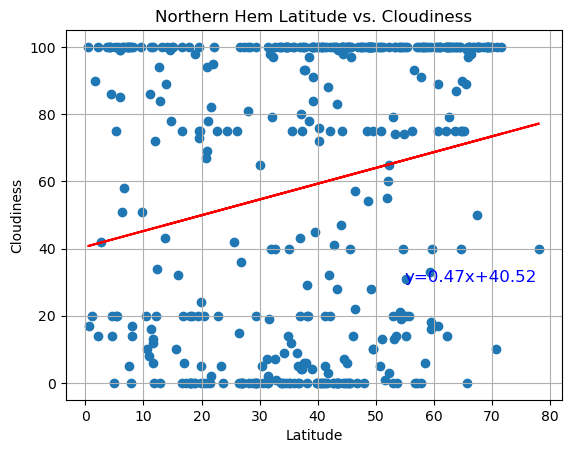

In [65]:
# Northern Hemisphere
x = df_northern['Lat']
y = df_northern['Cloudiness']
ann_loc = (55,30)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hem Latitude vs. Cloudiness")
plt.grid()
plt.show()

rvalue: 0.28189955678622314


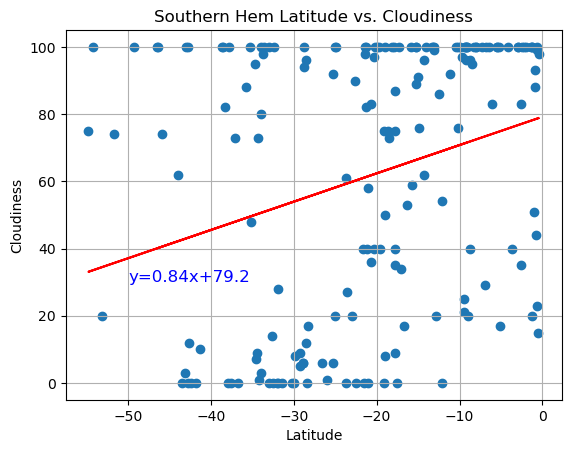

In [66]:
# Southern Hemisphere
x = df_southern['Lat']
y = df_southern['Cloudiness']
ann_loc = (-50,30)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hem Latitude vs. Cloudiness")
plt.grid()
plt.show()

**Discussion about the linear relationship:**  The linear regressions demonstrate a weak positive correlation between latitude and cloudiness in both the Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

rvalue: 0.3527497124693951


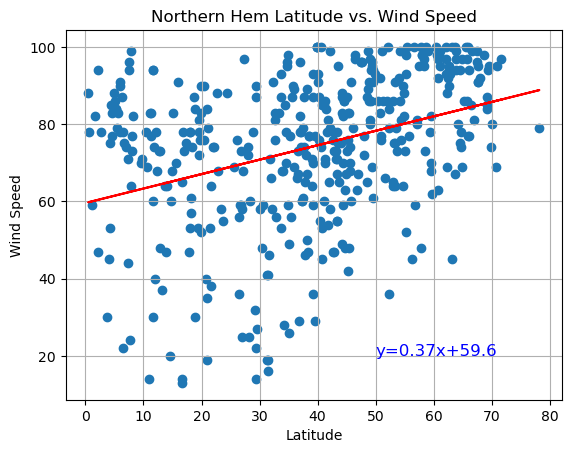

In [67]:
# Northern Hemisphere
x = df_northern['Lat']
y = df_northern['Humidity']
ann_loc = (50,20)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hem Latitude vs. Wind Speed")
plt.grid()
plt.show()

rvalue: 0.5680604793134191


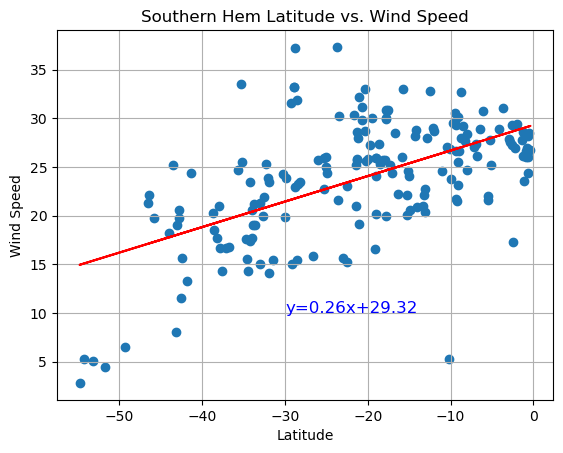

In [68]:
# Southern Hemisphere
x = df_southern['Lat']
y = df_southern['Max Temp']
ann_loc = (-30,10)
linear_regression()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hem Latitude vs. Wind Speed")
plt.grid()
plt.show()

**Discussion about the linear relationship:**  The linear regressions demonstrate a weak positive correlation between latitude and windspeed in the Nothern hemisphere, and a moderate positive correlation in the Southern hemisphere. 